In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import statsmodels.formula.api as smf     

# problem statement

1) Delivery_time -> Predict delivery time using sorting time.
2) Salary_hike -> Build a prediction model for Salary_hike.

Dataset name 
1>delivery_time
2>Salary_Data

------------------------------------------------------------

Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

# Problem 1

In [2]:
data= pd.read_csv("delivery_time.csv")

In [3]:
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [5]:
data=data.rename({'Delivery Time':'DeliveryTime','Sorting Time':'SortingTime'},axis=1)

In [6]:
data.shape

(21, 2)

In [7]:
data.isnull().sum()

DeliveryTime    0
SortingTime     0
dtype: int64

In [8]:
data.corr()

,DeliveryTime,SortingTime
DeliveryTime,1.000000,0.825997
SortingTime,0.825997,1.000000


In [9]:
data=data.rename({'Delivery Time':'DeliveryTime','Sorting Time':'SortingTime'},axis=1)

In [10]:
datap1=data

# Model(Without transformation)

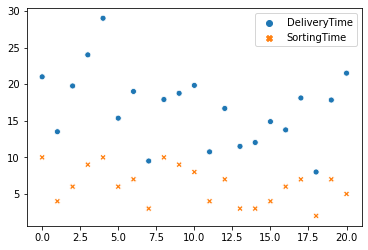

In [11]:
sns.scatterplot(data=datap1)

In [12]:
modelp1= smf.ols("DeliveryTime ~ SortingTime",data=datap1).fit()               #Y:X

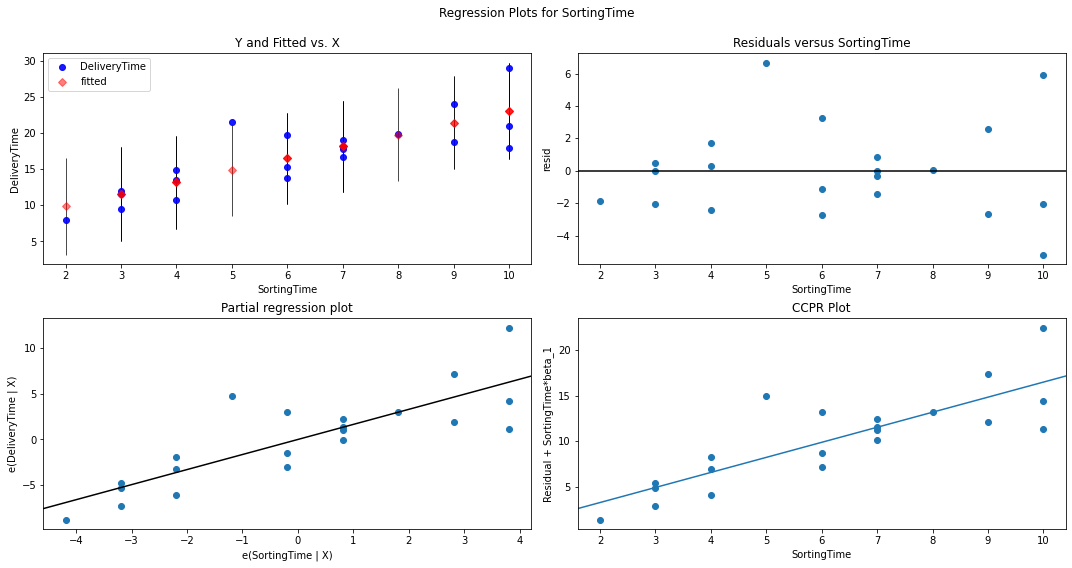

In [13]:
fig= plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(modelp1, "SortingTime",fig=fig)

In [14]:
(modelp1.rsquared, modelp1.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

# standard transformation

In [15]:
def reducescale(r1):
    return (r1-r1.mean())/r1.std()

In [16]:
datap2=datap1.copy()

In [17]:
datap2=reducescale(datap2)

In [18]:
modelp2= smf.ols("DeliveryTime ~ SortingTime",data=datap2).fit()

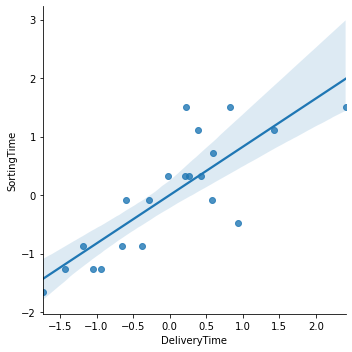

In [19]:
sns.lmplot(x='DeliveryTime',y='SortingTime',data=datap2)

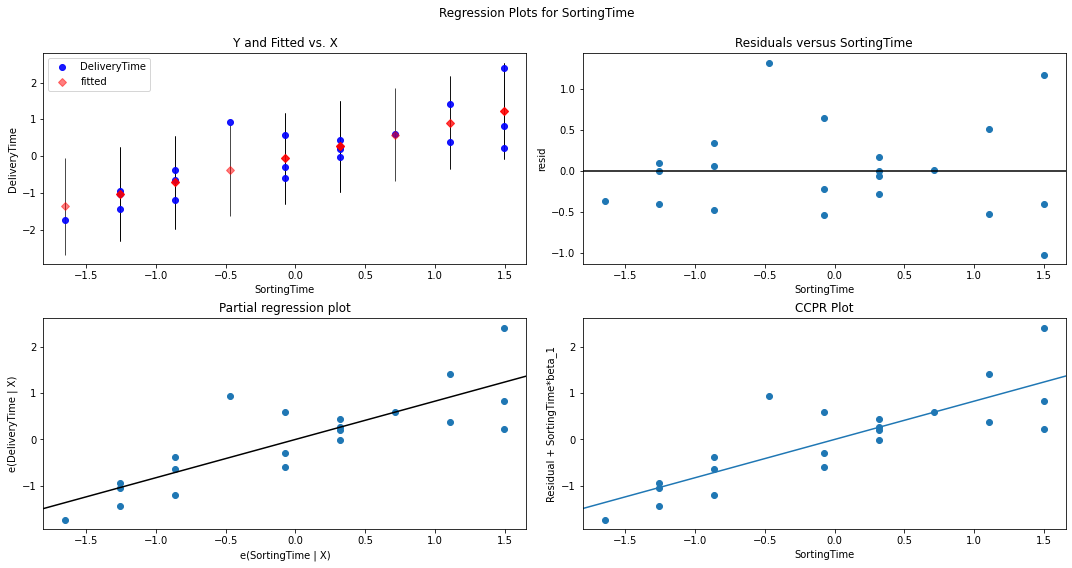

In [20]:
fig= plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(modelp2, "SortingTime",fig=fig)

In [21]:
(modelp2.rsquared, modelp2.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

# Normal transformation

In [22]:
def normal(r):
    return (r-r.min())/(r.max()-r.min())

In [23]:
datap3=datap1.copy()

In [24]:
datap3=normal(datap3)

In [25]:
modelp3= smf.ols("DeliveryTime ~ SortingTime",data=datap2).fit()

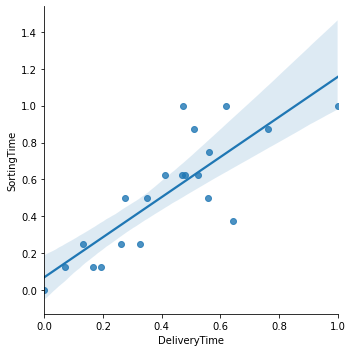

In [26]:
sns.lmplot(x='DeliveryTime',y='SortingTime',data=datap3)

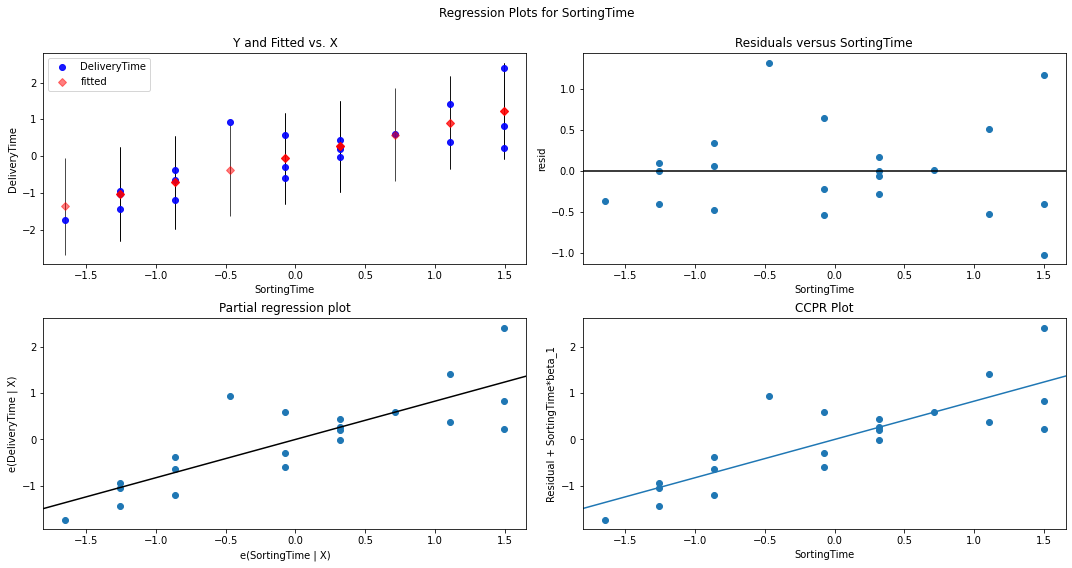

In [27]:
fig= plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(modelp3, "SortingTime",fig=fig)

In [28]:
(modelp3.rsquared, modelp3.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

# log transformation

In [29]:
def logvalue(a):
    a=np.log(a)
    return a

In [30]:
datap4=datap1.copy()

In [31]:
datap4=logvalue(datap4)

In [32]:
modelp4= smf.ols("DeliveryTime ~ SortingTime",data=datap4).fit()

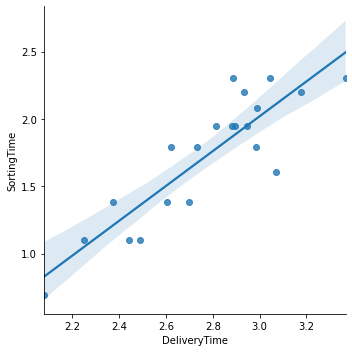

In [33]:
sns.lmplot(x='DeliveryTime',y='SortingTime',data=datap4)

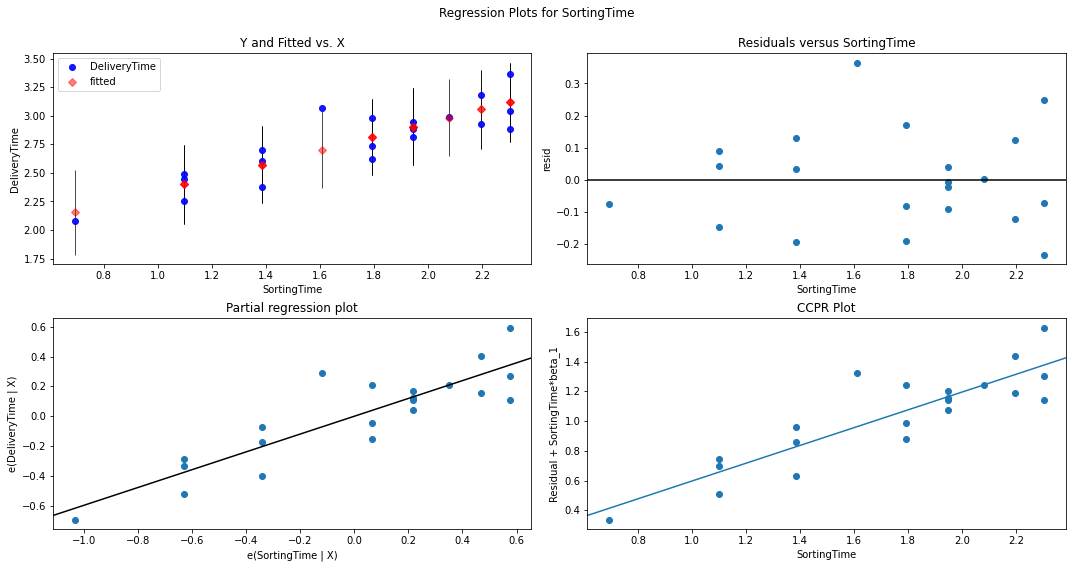

In [34]:
fig= plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(modelp4, "SortingTime",fig=fig)

In [35]:
(modelp4.rsquared, modelp4.rsquared_adj)

(0.77216134926874, 0.7601698413355158)

# summary

In [36]:
# Model(Without transformation)    0.6822714748417231
# standard transform               0.6822714748417231
# normal transform                 0.6822714748417231
# log transforn                    0.77216134926874 

#conclusion: applying different transformation clearly the log transformation yeilds better result   

# Test data creation

In [37]:
p1=pd.Series([6.0,6.5,6.8])

In [38]:
pred1=pd.DataFrame(p1,columns=['SortingTime'])

In [39]:
pred1=np.log(pred1)

In [40]:
np.exp(modelp4.predict (pred1))

0    16.653216
1    17.469049
2    17.946429
dtype: float64

# problem 2 

In [41]:
data1=pd.read_csv("Salary_Data.csv")

In [42]:
data1.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [43]:
data1.shape

(30, 2)

In [44]:
data1.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [45]:
data1.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [46]:
data1.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


The variation of slary is very high and the variation of age is very less and also the intial start values are very different.

Reducing the scale to normal distribution

# Model(Without transformation)

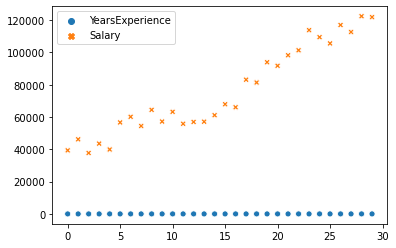

In [47]:
sns.scatterplot(data=data1)

In [48]:
model1= smf.ols("Salary~YearsExperience",data=data1).fit()

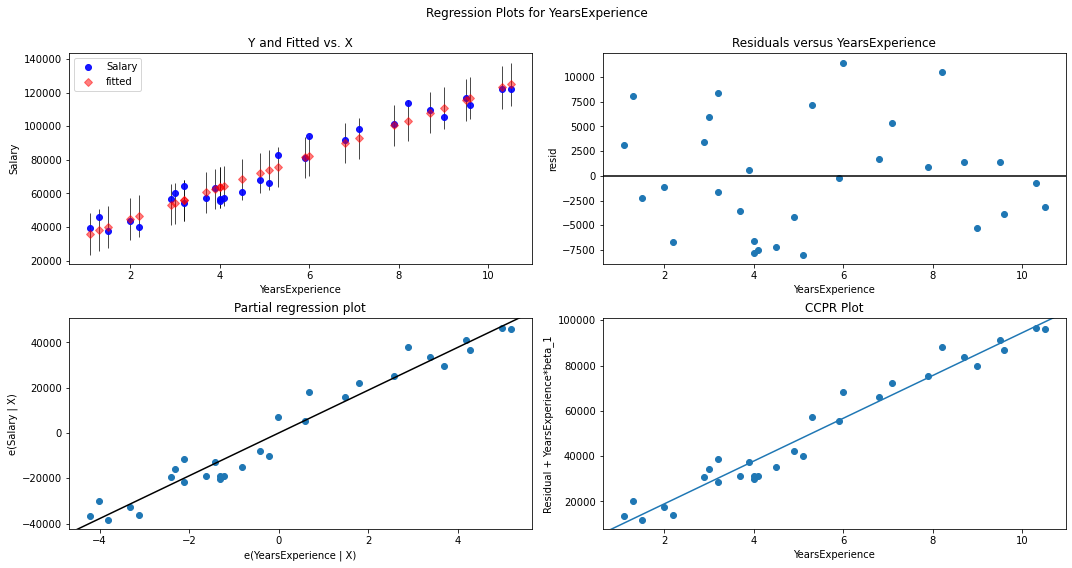

In [49]:
fig= plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "YearsExperience",fig=fig)

In [50]:
(model1.rsquared,model1.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

# Standard transformation

In [51]:
def reducescale(r1):
    return (r1-r1.mean())/r1.std()

In [52]:
data2=data1.copy()

In [53]:
data2=reducescale(data2)

In [54]:
data2.head()

,YearsExperience,Salary
0,-1.484672,-1.337252
1,-1.414197,-1.086946
2,-1.343722,-1.396053
3,-1.167535,-1.184705
4,-1.097060,-1.317262


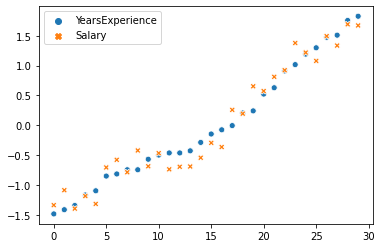

In [55]:
sns.scatterplot(data=data2)

In [56]:
model2= smf.ols("Salary~YearsExperience",data=data2).fit()

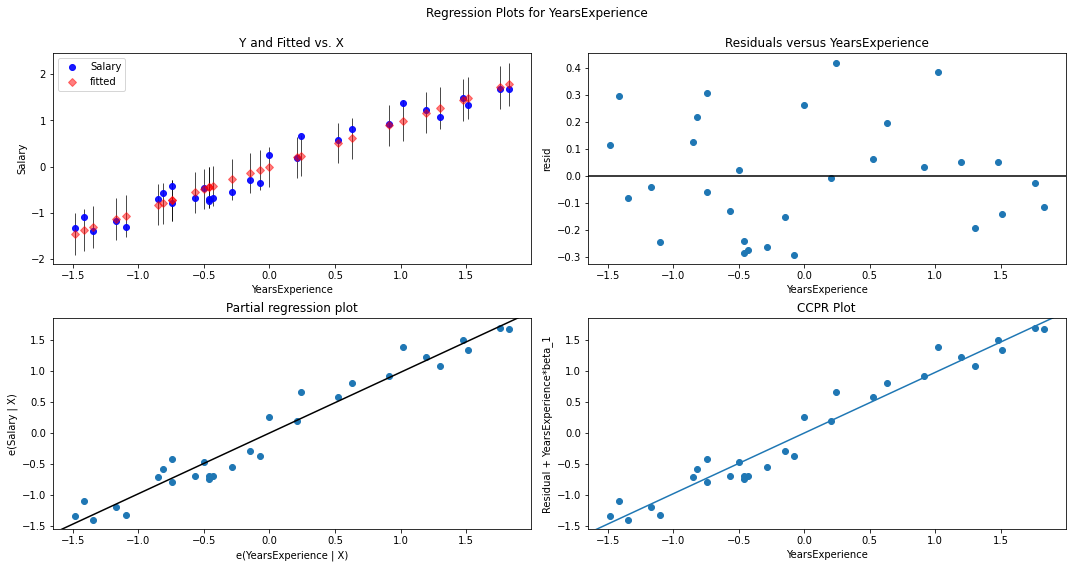

In [57]:
fig= plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model2, "YearsExperience",fig=fig)

In [58]:
(model2.rsquared,model2.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

# Normalisation transformation

In [59]:
def normal(z):
    return (z-z.min())/(z.max()-z.min())

In [60]:
data3=data1.copy()

In [61]:
data3=normal(data3)

In [62]:
data3.head()

,YearsExperience,Salary
0,0.000000,0.019041
1,0.021277,0.100094
2,0.042553,0.000000
3,0.095745,0.068438
4,0.117021,0.025514


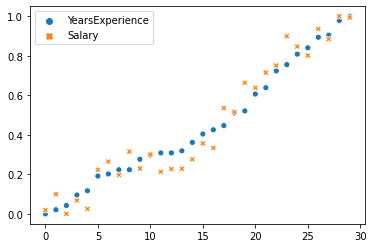

In [63]:
sns.scatterplot(data=data3)

In [64]:
model3= smf.ols("Salary~YearsExperience",data=data3).fit()

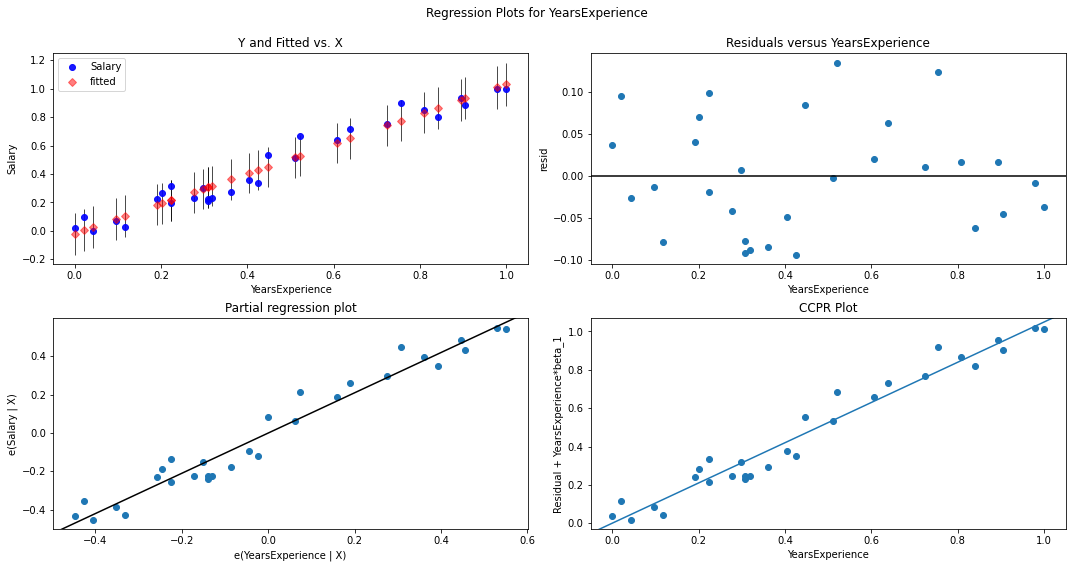

In [65]:
fig= plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model3, "YearsExperience",fig=fig)

In [66]:
(model3.rsquared,model3.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

# logirithmic transformation

In [67]:
def log(z):
    z = np.log(z) 
    return z

In [68]:
data4=data1.copy()

In [69]:
data4=log(data4)

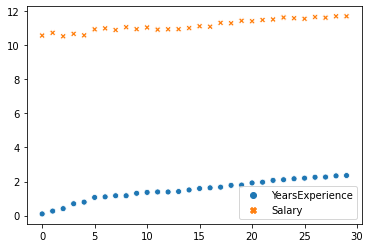

In [70]:
sns.scatterplot(data=data4)

In [71]:
data4.head()

,YearsExperience,Salary
0,0.095310,10.580073
1,0.262364,10.740843
2,0.405465,10.538237
3,0.693147,10.681091
4,0.788457,10.593906


In [72]:
model4= smf.ols("Salary~YearsExperience",data=data4).fit()

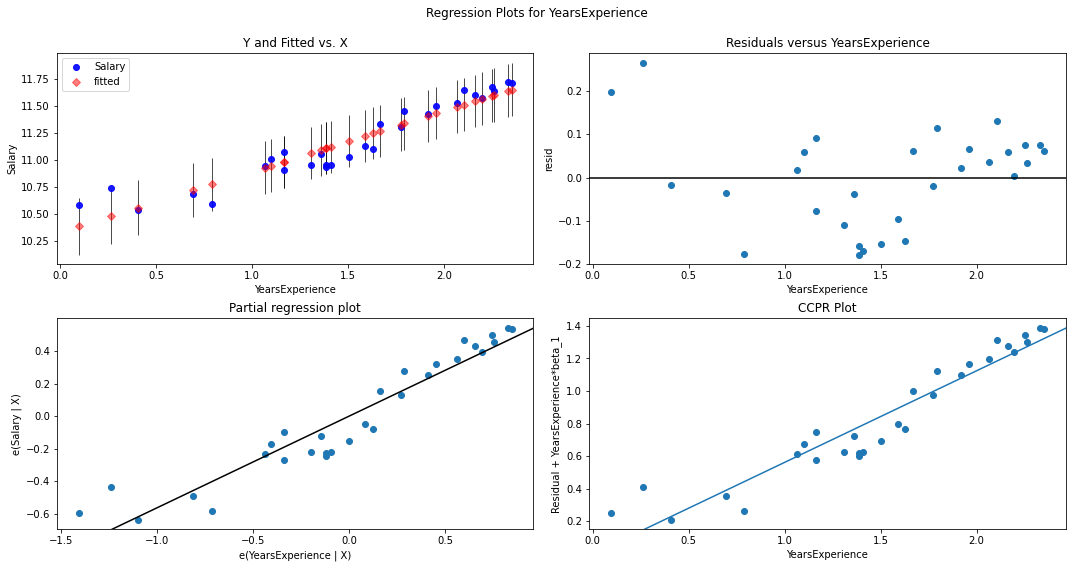

In [73]:
fig= plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model4, "YearsExperience",fig=fig)

In [74]:
(model4.rsquared,model4.rsquared_adj)

(0.9052150725817149, 0.9018298966024904)

# summary

In [75]:
# Model(Without transformation)    0.9569566641435086
# standard transform               0.9569566641435086
# normal transform                 0.9569566641435086
# log transforn                    0.9052150725817149

#conclusion: standard and normal transformation have no effect on efficiency.

# Test data

In [76]:
p2=pd.Series([5,6,7])

In [77]:
prep2= pd.DataFrame(p2,columns=['YearsExperience'])

In [78]:
prep2

,YearsExperience
0,5
1,6
2,7


In [79]:
model1.predict(prep2)

0    73042.011806
1    82491.974127
2    91941.936449
dtype: float64

In [80]:
#data1['Salary'] = np.log(data1['Salary']) 
#data1['YearsExperience'] = np.log(data1['YearsExperience']) 